In [1]:
%load_ext autoreload
%autoreload 2

import ncem
import scanpy as sc

datadir = '.'

In [2]:
sc.settings.set_figure_params(dpi=80, facecolor='white')

# Load data

In [3]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_path=datadir + '/busch/',
    data_origin='jarosch',
    radius=80,
    node_label_space_id='type',
    node_feature_space_id='standard',
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Loading data from raw files
registering celldata
collecting image-wise celldata
adding graph-level covariates


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.21it/s]

Loaded 2 images with complete data from 1 patients over 11321 cells with 19 cell features and 12 distinct celltypes.
(11321, 12)
node_types
h_0 12
h_1 19
Mean of mean node degree per images across images: 18.522793

 Celldata metadata: {'lateral_resolution': 0.5, 'fn': 'raw_inflamed_colon_1.h5ad', 'image_col': 'Annotation', 'pos_cols': ['X', 'Y'], 'cluster_col': 'celltype_Level_2', 'cluster_col_preprocessed': 'celltype_Level_2_preprocessed', 'patient_col': None}


# Supp. Fig. 1: Cell-type centric summary statistics in chip cytometry dataset. 

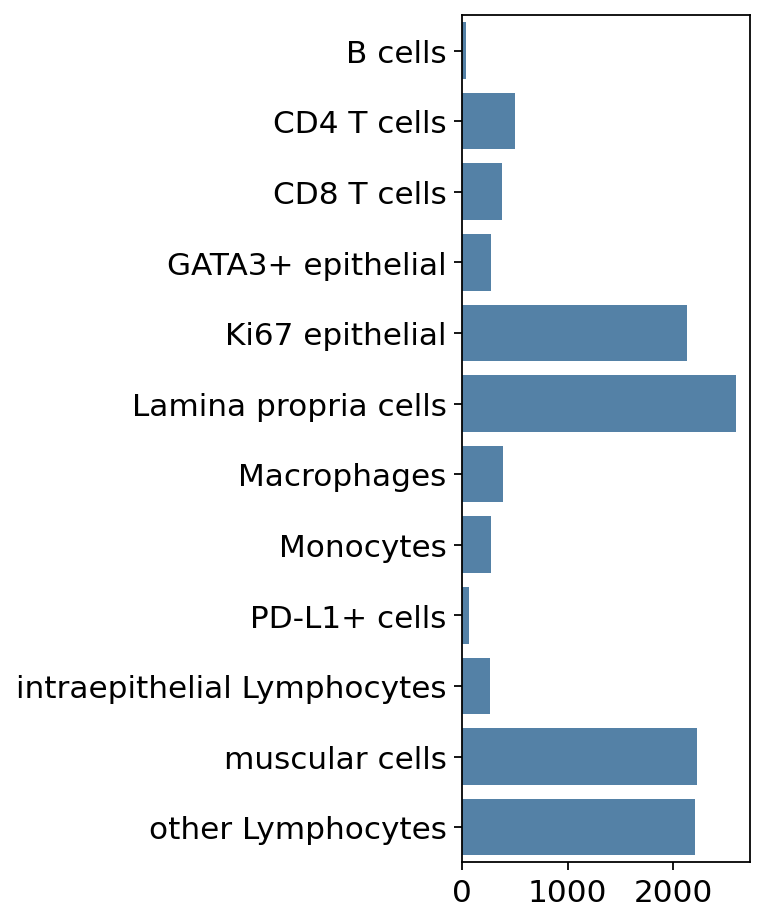

In [4]:
interpreter.data.celltype_frequencies()

0.0
1.0277843237036042
2.0687580050480765
5.883873096223624
19.52279334540473
104.03451859527686
1182.610210062652
5660.5


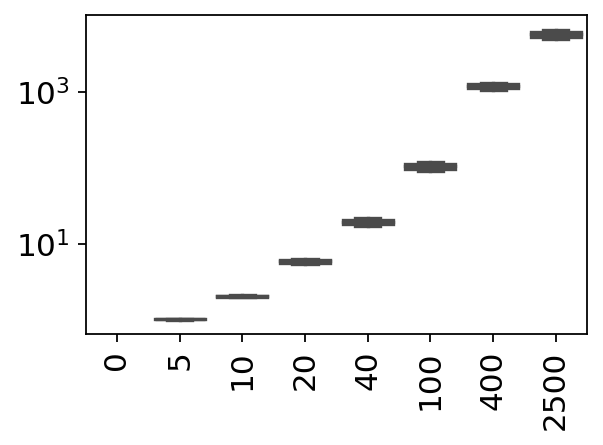

In [5]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 10, 20, 40, 80, 200, 800, 5000],
    lateral_resolution=0.5,
)

# Supp. Fig. 3: Variance decomposition in chip cytometry dataset.

  0%|                                                                                                                       | 0/2 [00:00<?, ?it/s]/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.82s/it]


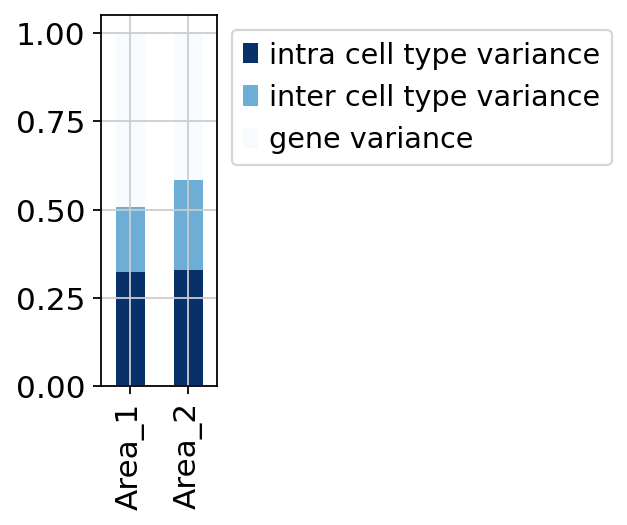

In [6]:
var_decomp = interpreter.data.compute_variance_decomposition()
interpreter.data.variance_decomposition(
    var_decomp, figsize=(4.,3.5)
)

In [7]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.325813
inter cell type variance    0.218986
gene variance               0.455201
dtype: float32

# Supp. Fig. 6: Normalised contact frequencies of cell-types in spatial neighborhoods

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.59it/s]


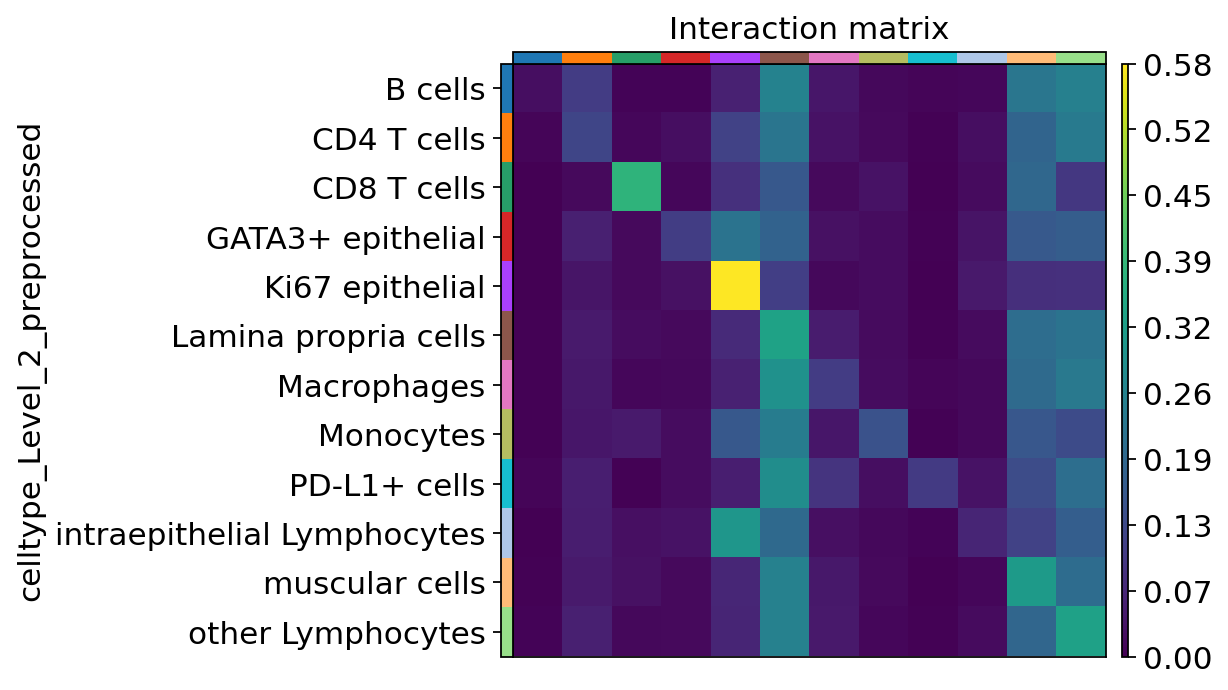

In [8]:
interpreter.data.celldata_interaction_matrix(figsize=(4,4))

# Supp. Fig. 7: Ligand–receptor permutation test. 

n cells: 11321


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/squidpy/gr/_ligrec.py:453: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  self._filtered_data = self._data.loc[:, set(self.interactions[SOURCE]) | set(self.interactions[TARGET])]


  0%|          | 0/1000 [00:00<?, ?permutation/s]

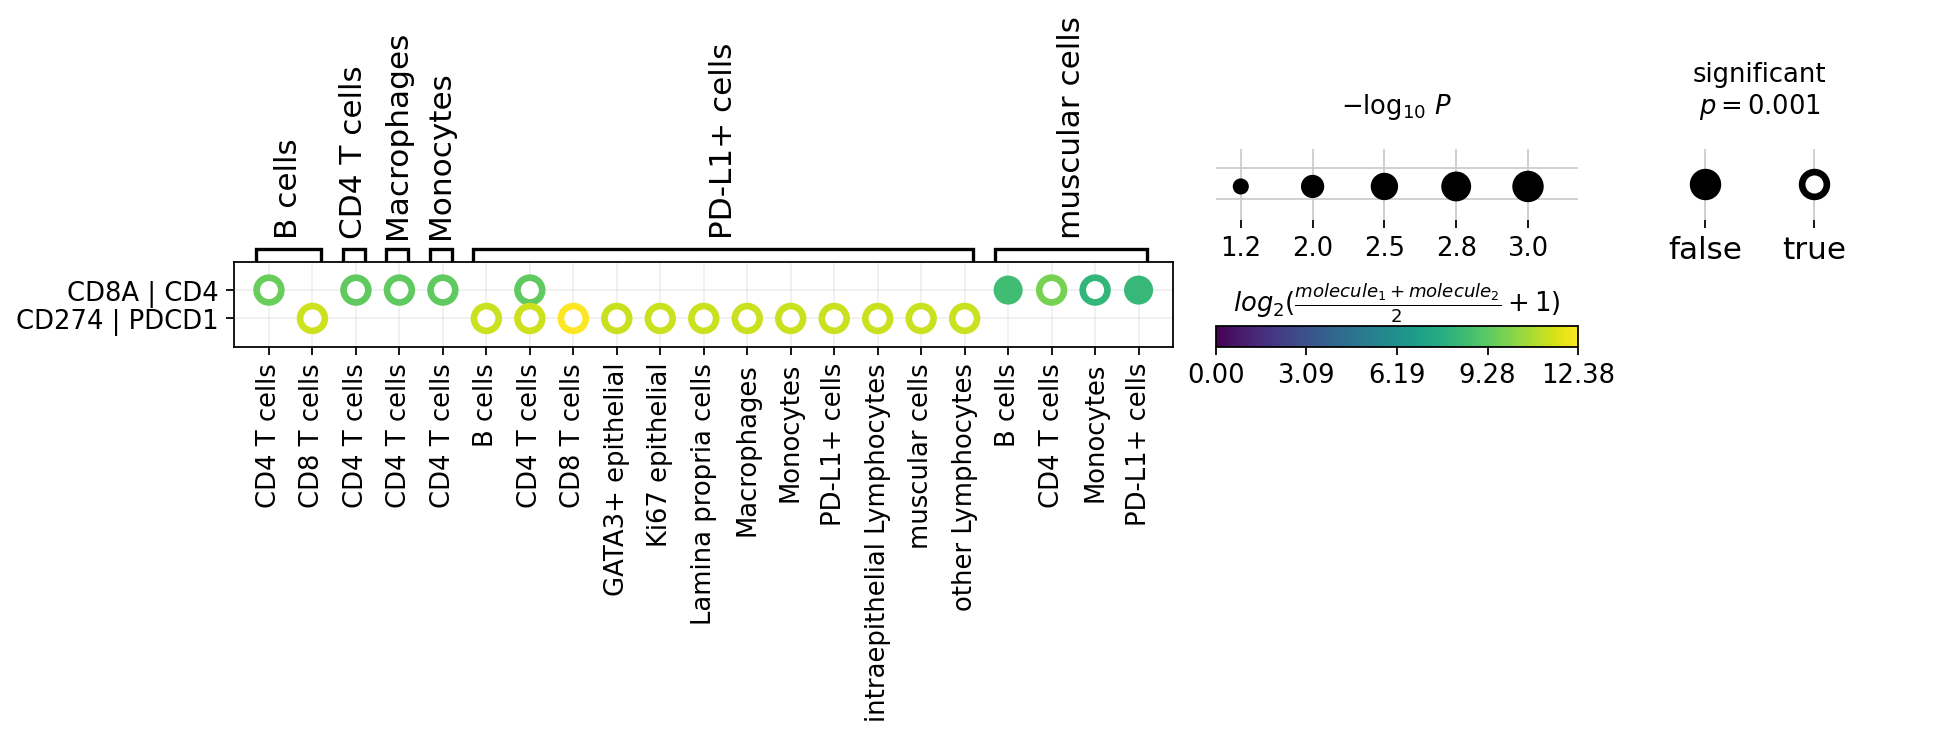

In [9]:
adata = interpreter.data.ligrec(
    pvalue_threshold=0.05,
)

# Supp. Fig. 8: Attributing cell heterogeneity to niche composition in Cd8 Tcells in inflamed colon. 

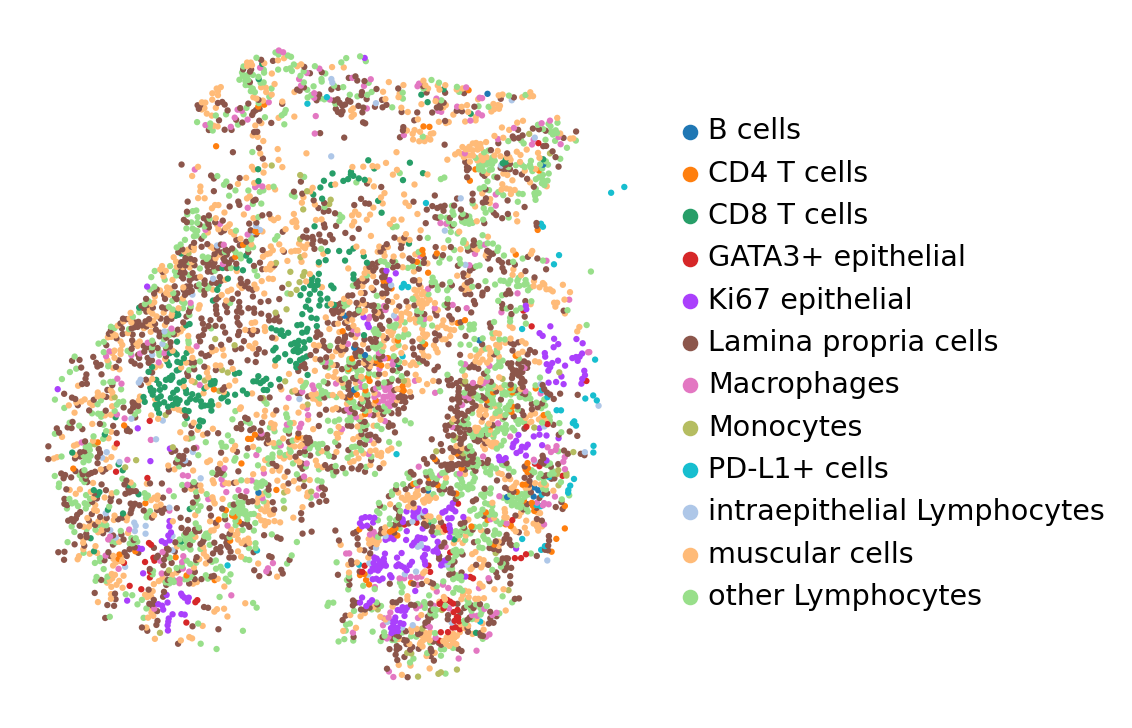

In [10]:
interpreter.data.spatial(image_key= "Area_1", copy=False)

n cells:  234
CD8 T cells 0    74
CD8 T cells 1    58
CD8 T cells 2    41
CD8 T cells 3    37
CD8 T cells 4    24
Name: CD8 T cells substates, dtype: int64


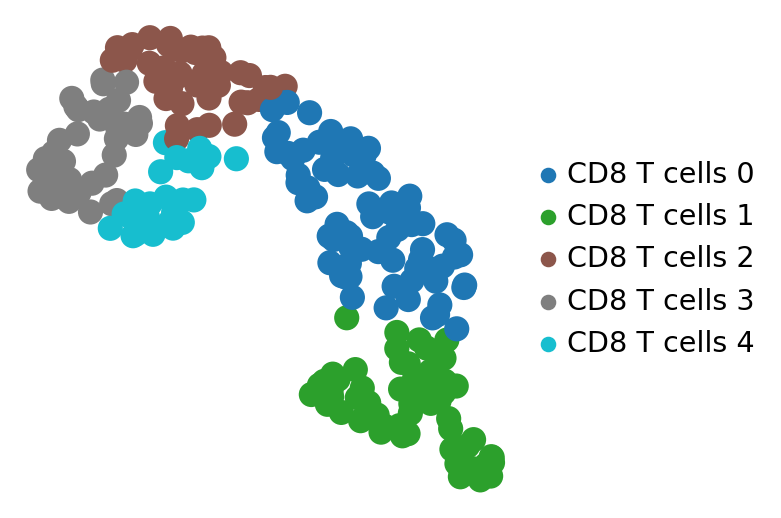

In [11]:
adata = interpreter.data.umap(
    image_key= "Area_1",
    target_cell_type='CD8 T cells',
    n_neighbors=22,
    n_pcs=None,
    palette='tab10'
)

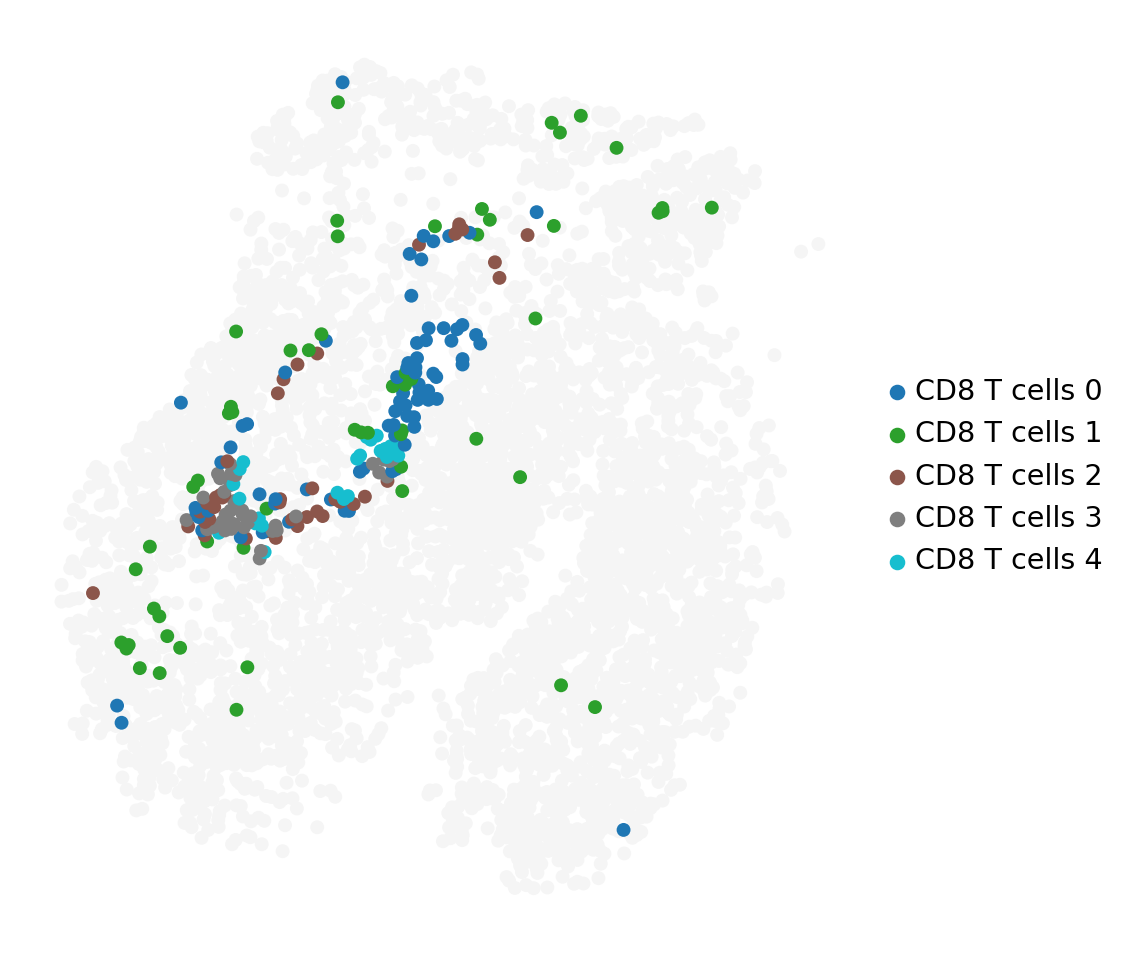

In [12]:
interpreter.data.spatial_substates(
    adata,
    image_key= "Area_1",
    target_cell_type='CD8 T cells',
    spot_size=50
)

In [13]:
filter_titles = [
    'B cells',
    'CD4 T cells',
    'CD8 T cells',
    'GATA3+ epithelial',
    'Ki67 epithelial',
    'Lamina propria cells',
    'Macrophages',
    'Monocytes',
    'intraepithelial Lymphocytes',
    'muscular cells',
    'other Lymphocytes'
]

adata_img, adata, log_pval, fold_change = interpreter.data.compute_cluster_enrichment(
    image_key=['Area_1'],
    target_cell_type='CD8 T cells',
    clip_pvalues=-5,
    n_neighbors=22,
    n_pcs=None,
    filter_titles=filter_titles
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  5.83it/s]


n cells:  234
CD8 T cells 0    74
CD8 T cells 1    58
CD8 T cells 2    41
CD8 T cells 3    37
CD8 T cells 4    24
Name: CD8 T cells substates, dtype: int64


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Annotation' as categorical


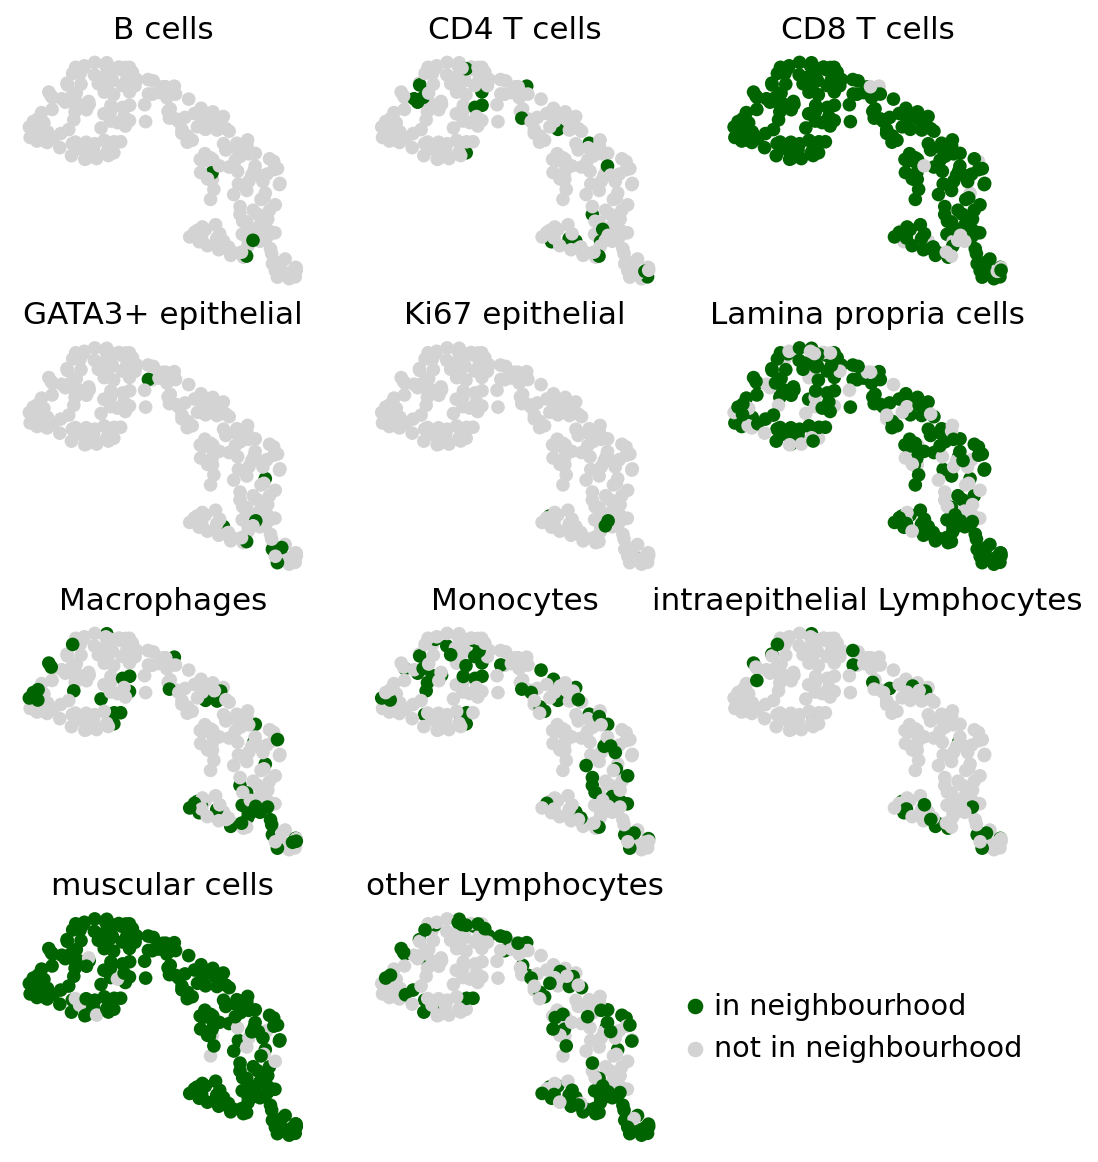

In [14]:
interpreter.data.umaps_cluster_enrichment(
    adata, 
    nrows=4,
    ncols=3,
    figsize=(8,9),
    filter_titles=filter_titles,
    size=150
)

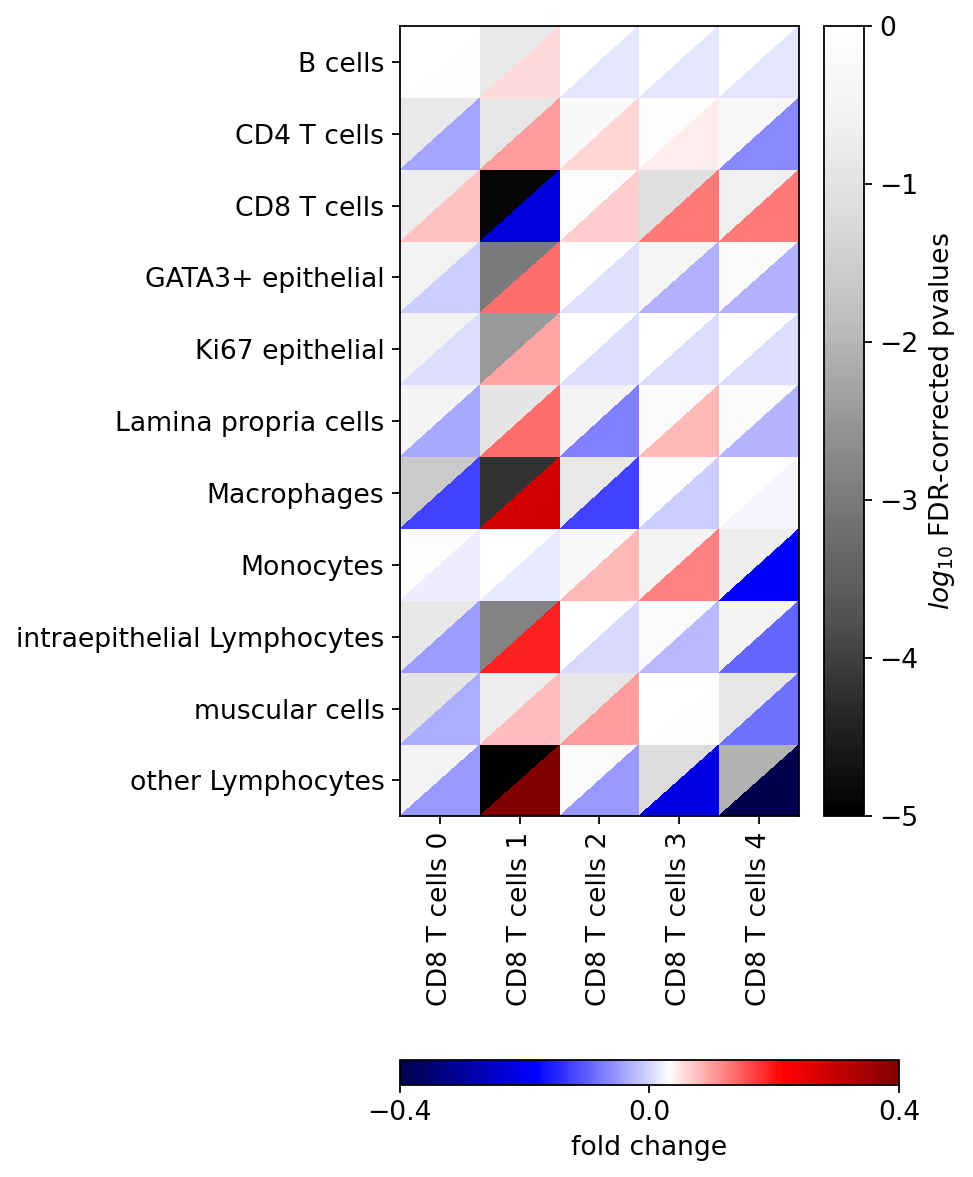

In [17]:
interpreter.data.cluster_enrichment(
    pvalues=log_pval, 
    fold_change=fold_change,
    pad=0.2,
    linspace=(-0.4, 0.4, 3)
)

# Supp. Fig. 13: Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

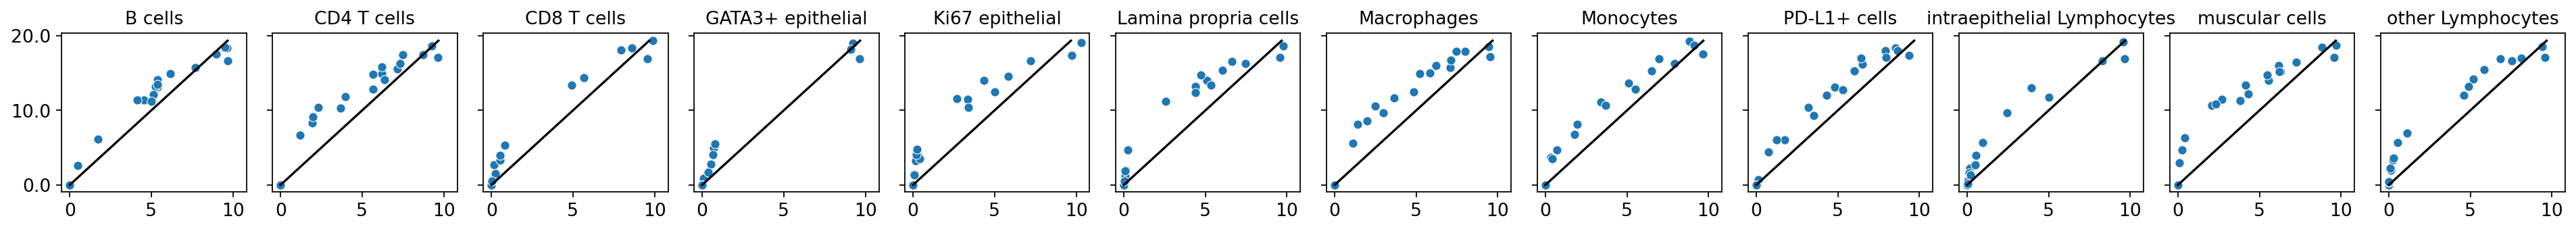

In [16]:
interpreter.data.noise_structure(fontsize=12)